In [32]:
# Import necessary libraries

import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries
import geoplot
import shapely
import shapely.speedups
import matplotlib.pyplot as plt
import math
import numpy


In [33]:
# Set display options for data tables (for debugging purposes)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
shapely.speedups.enable()

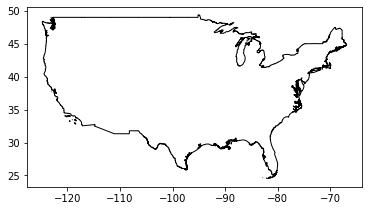

In [34]:
# Get shape file of Continguous US

df = gpd.read_file('CartographicBoundries/US_State/cb_2018_us_state_500k.shp')
df = df.drop([37,38,44,45,13,27,42])
contUSdf = df.dissolve()
ax = contUSdf.plot(color='white', edgecolor='black')

bound = pd.DataFrame(contUSdf.bounds)

In [52]:
# Read in shapefile with all lines over 500kV capacity

lines = gpd.read_file("Powerlines.zip")

power = shapely.ops.unary_union(lines['geometry'])
print(type(power))

<class 'shapely.geometry.multilinestring.MultiLineString'>


In [36]:
# Read in data CSV file to get existing points

point_data = gpd.read_file("Data/ContinguousUS_data.csv")
points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(point_data.lon, point_data.lat))

In [75]:
# Find distance from point to nearest power line

def get_geom(row):
    geom = row.geometry
    print(type(geom))
    return geom

def points_to_compare(point, linestring):
    geoseries_points = gpd.GeoSeries()
    geoseries_points_on_lines = gpd.GeoSeries()
    for row in range(len(point)):
        dist = shapely.ops.nearest_points(point.iat[row, 0], linestring)
        series_points = gpd.GeoSeries(dist[0])
        series_points_on_lines = gpd.GeoSeries(dist[1])
        geoseries_points = pd.concat([geoseries_points, series_points])
        geoseries_points_on_lines = pd.concat([geoseries_points_on_lines, series_points_on_lines])
    return geoseries_points, geoseries_points_on_lines

def distance(points, points_on_line):
    dists = points.distance(points_on_line, align=False)
    return dists

point_series = list(points_to_compare(points, power))
final_dists = distance(point_series[0], point_series[1])
print(final_dists)

0    9.435262e+06
0    9.435265e+06
0    9.435265e+06
0    9.435265e+06
0    9.435265e+06
0    9.435265e+06
0    9.435264e+06
0    9.435264e+06
0    9.435264e+06
0    9.435264e+06
0    9.435264e+06
0    9.435264e+06
0    9.435263e+06
0    9.435263e+06
0    9.435263e+06
0    9.435263e+06
0    9.435263e+06
0    9.435263e+06
0    9.435266e+06
0    9.435266e+06
0    9.435266e+06
0    9.435266e+06
0    9.435266e+06
0    9.435265e+06
0    9.435265e+06
0    9.435265e+06
0    9.435265e+06
0    9.435265e+06
0    9.435265e+06
0    9.435264e+06
0    9.435264e+06
0    9.435264e+06
0    9.435264e+06
0    9.435264e+06
0    9.435264e+06
0    9.435263e+06
0    9.435263e+06
0    9.435267e+06
0    9.435267e+06
0    9.435267e+06
0    9.435266e+06
0    9.435266e+06
0    9.435266e+06
0    9.435266e+06
0    9.435266e+06
0    9.435266e+06
0    9.435265e+06
0    9.435265e+06
0    9.435265e+06
0    9.435265e+06
0    9.435265e+06
0    9.435265e+06
0    9.435265e+06
0    9.435264e+06
0    9.435264e+06
0    9.435

In [61]:
def create_geoseries(geodataframe):
    series = gpd.GeoSeries(geodataframe.geometry)
    return series

def distance(points, multilinestring):
    point_series = create_geoseries(points)
    dists = point_series.distance(multilinestring)
    return dists

final_distances = distance(points, power)
print(final_distances)

0       9.435262e+06
1       9.435265e+06
2       9.435265e+06
3       9.435265e+06
4       9.435265e+06
5       9.435265e+06
6       9.435264e+06
7       9.435264e+06
8       9.435264e+06
9       9.435264e+06
10      9.435264e+06
11      9.435264e+06
12      9.435263e+06
13      9.435263e+06
14      9.435263e+06
15      9.435263e+06
16      9.435263e+06
17      9.435263e+06
18      9.435266e+06
19      9.435266e+06
20      9.435266e+06
21      9.435266e+06
22      9.435266e+06
23      9.435265e+06
24      9.435265e+06
25      9.435265e+06
26      9.435265e+06
27      9.435265e+06
28      9.435265e+06
29      9.435264e+06
30      9.435264e+06
31      9.435264e+06
32      9.435264e+06
33      9.435264e+06
34      9.435264e+06
35      9.435263e+06
36      9.435263e+06
37      9.435267e+06
38      9.435267e+06
39      9.435267e+06
40      9.435266e+06
41      9.435266e+06
42      9.435266e+06
43      9.435266e+06
44      9.435266e+06
45      9.435266e+06
46      9.435265e+06
47      9.435